In [0]:
import numpy as np
import matplotlib.pyplot as plt
import random
from mpl_toolkits.mplot3d import axes3d

# Градиенты

In [0]:
W0, W1, _ = axes3d.get_test_data(0.5)

In [0]:
a = 1
b = 2
w0_s = 10
w1_s = 10
E = (a*W0)**2+(b*W1)**2
#E = (a*W0)**2+(b*W1)**2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: The following kwargs were not used by contour: 'width', 'height'
  


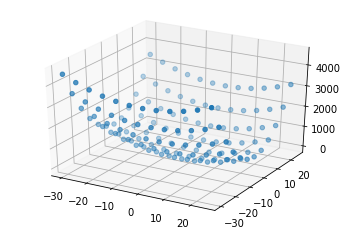

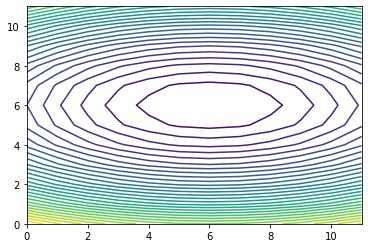

In [0]:
fig1 = plt.figure()
ax = fig1.add_subplot(111, projection='3d')
ax.scatter(W0, W1, E,)
fig2 = plt.figure()
ax = fig2.add_subplot(111)
ax.contour(E, levels = 30,width=1000,height=1000)

# Седловая точка

In [0]:
W0, W1, _ = axes3d.get_test_data(0.5)

In [0]:
E = W0**2-W1**2+1000

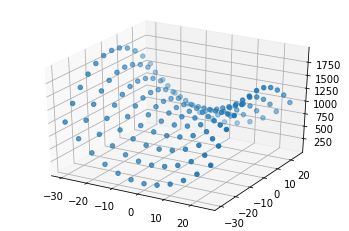

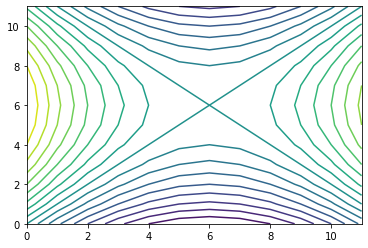

In [0]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(W0, W1, E)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.contour(E, levels = 20)

In [0]:
init_w0 = W0[5,0]
init_w1 = W1[5,0]
init_e = init_w0**2-init_w1**2+1000

In [0]:
w0 = init_w0
w1 = init_w1
e = init_e
w0_s = [w0]
w1_s = [w1]
e_s = [e]
for k in range(20):
    w0 -= 0.2*w0
    w1 -= 0.2*w1
    e = w0**2-w1**2+1000
    w0_s.append(w0)
    w1_s.append(w1)
    e_s.append(e)


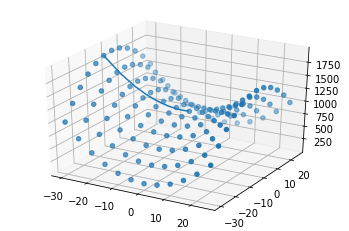

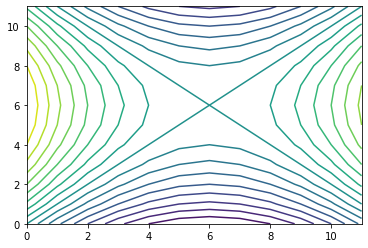

In [0]:
fig1 = plt.figure()
ax = fig1.add_subplot(111, projection='3d')
ax.plot(w0_s,w1_s,e_s)
ax.scatter(W0, W1, E)
fig2 = plt.figure()
ax = fig2.add_subplot(111)
ax.contour(E, levels = 20)

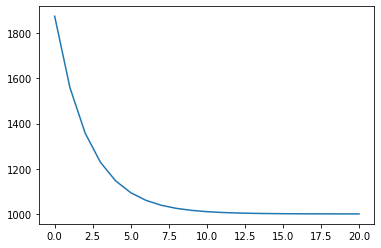

In [0]:
plt.plot(e_s)

# Отпимизации

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torch.utils.data import DataLoader

import torchvision
from torchvision.datasets import CIFAR10
import torchvision.transforms as transforms

import matplotlib.pyplot as plt

In [0]:
transform_ = transforms.Compose([transforms.ToTensor(), transforms.Normalize(0.5,0.5, 0.5)])
train_dataset = CIFAR10(root = '/cifar10', download=True,transform=transform_, train=True)
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)

In [0]:
transform_ = transforms.Compose([transforms.ToTensor(), transforms.Normalize(0.5,0.5, 0.5)])
test_dataset = CIFAR10(root = '/cifar10', download=True,transform=transform_, train=False)

Files already downloaded and verified


In [0]:
class Net(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels = 3, out_channels=8, kernel_size=3)
        self.conv2 = nn.Conv2d(in_channels = 8, out_channels=8, kernel_size=3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(in_channels = 8, out_channels=16, kernel_size=3)
        self.conv4 = nn.Conv2d(in_channels = 16, out_channels=16, kernel_size=3)
        self.fc1 = nn.Linear(16 * 5 * 5, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, num_classes)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.pool(x)

        x = self.conv3(x)
        x = F.relu(x)
        x = self.conv4(x)
        x = F.relu(x)
        x = self.pool(x)

        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.softmax(self.fc3(x),dim=1)
        return x

In [0]:
model = Net(10).cuda()
optimizer = optim.SGD(params=model.parameters(), lr = 0.01)
criterion = nn.CrossEntropyLoss()

In [0]:
losses = []
num_epochs=100
model.train()
for epoch in range(0,num_epochs):
    epoch_losses = []
    for images, labels in train_loader:
        images = images.cuda()
        labels = labels.cuda()

        model.zero_grad()
        pred = model(images)
        loss = criterion(pred, labels)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
        epoch_losses.append(loss.item())
    print("Epoch [{}/{}], Loss: {}".format(epoch+1, num_epochs, sum(epoch_losses)/len(epoch_losses)))

In [0]:
plt.plot(losses)

In [0]:
test_dataloader = DataLoader(dataset=test_dataset, batch_size=64)
model.eval()
result = 0
n = 0
for images, labels in test_dataloader:
    n+=images.size(0)
    images = images.cuda()
    labels = labels.cuda()
    pred = model(images)
    prediction = torch.argmax(pred,1)
    res = torch.eq(prediction.cpu(),labels.cpu()).sum()
    result+=res.item()
print('Result: {}%'.format(result/n*100))

# Домашнее задание

**Задача 1.** Посчитайте потенциал и направление вдоль которого растёт его величина в точке.
1. Потенциал электрического поля от неподвижного заряда, расположенного (10, 5), в точке (20, 10).
2. "Потенциал" для ошибки, который вычисляется по формуле -lg(10\*w0+w1**2) в точке w0= 100 w1=10

**Задача 2.** Рассчитайте скользящее средние с B=0.8 по array



In [0]:
array = [0.2,0.3,0.31,0.29,0.34,0.5,0.44,0.51,0.53]

**Задача 3.** Изменить архитектуру и параметры сети, а также параметры обучения из приведенного выше кода так, чтобы достигнуть точность в 70% на тесте меньше чем за 100 эпох

**Задача 4.** Вычислите значение выражения sigmoid(w1\*(sigmoid(w0\*x0)-0.5))-0.5 с параметрами:
1. x0 = 0.1, и w0 = 1, w1 = 1
2. x0 = 0.2, и w0 = 1, w1 = 1
3. x0 = 0.3, и w0 = 1, w1 = 1
4. x0 = 0.2, и w0 = 2, w1 = 1
5. x0 = 0.2, и w0 = 1, w1 = 2

Какие выводы можно из сделать из полученных ответов?

**Задача 5.** Точки в которой производная функции обращается в 0 могут быть точками максимума, точками минимума и седловыми точками. Чем является точка P для функции f
1. P: x=0, f(x)=x**3
2. P: x=2, y=3, f(x,y)=(x-2)\*\*2+(y-3)\*\*2
3. P: w0=0, w1=0, f(w0,w1)=-w0\*\*4-(w1\*\*4-400\*w1\*\*2)
4. P: w0=0, w1=0, f(w0,w1)=-w0\*\*2-w1\*\*4
